In [1]:
# importing the required packages from pytorch for implementing lenet-5 
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import torchvision.datasets as datasets
import matplotlib.pyplot as plt
import numpy as np


In [2]:
batch_size = 64
num_classes = 10
learning_rate = 0.001
num_epochs = 10


#the below device will determine whether to run via GPU or CPU and for this network we are considering cpu.
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [3]:
#load the MNIST DATASET from torchvision using pytorch
train_data = torchvision.datasets.MNIST(root = './data', train = True, transform = transforms.Compose([transforms.Resize((32,32)),transforms.ToTensor(),transforms.Normalize(mean = (0.1307,), std = (0.3081,))]), download = True)
images, labels = next(iter(train_data))
images.shape

torch.Size([1, 32, 32])

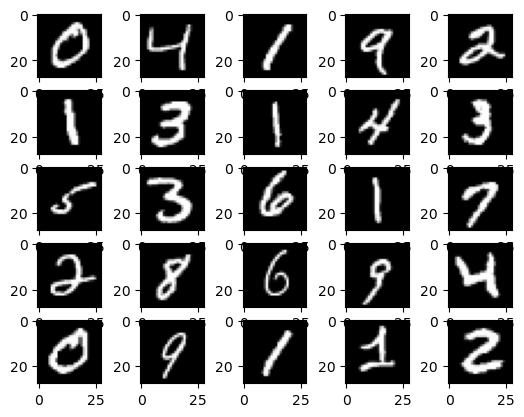

In [4]:
#https://www.askpython.com/python/examples/load-and-plot-mnist-dataset-in-python
#visualizing the images from the dataset
for i in range(1, 5*5+1):  
    plt.subplot(5, 5, i)
    plt.imshow(train_data.data[i],  cmap=plt.get_cmap('gray'))
plt.show()

In [5]:
#loading the testdataset from pytorch
test_data = torchvision.datasets.MNIST(root = './data',train = False,transform = transforms.Compose([transforms.Resize((32,32)),transforms.ToTensor(),transforms.Normalize(mean = (0.1325,), std = (0.3105,))]),download=True)
images, labels = next(iter(test_data))
images.shape

torch.Size([1, 32, 32])

In [6]:
#we use loaders to load the dataset into multiple batches
train_loader = torch.utils.data.DataLoader(dataset = train_data,batch_size = batch_size,shuffle = True)


test_loader = torch.utils.data.DataLoader(dataset = test_data,batch_size = batch_size,shuffle = True)

In [7]:
#Defining the convolutional neural network and we are importing nn.module so we can get convolutional 2d normalization sequential and ReLU

class LeNet5(nn.Module):
    def __init__(self, num_classes):
        super().__init__()
        self.layer1 = nn.Sequential(
            nn.Conv2d(1, 6, kernel_size=5, stride=1, padding=0),
            nn.BatchNorm2d(6),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size = 2, stride = 2))
        self.layer2 = nn.Sequential(
            nn.Conv2d(6, 16, kernel_size=5, stride=1, padding=0),
            nn.BatchNorm2d(16),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size = 2, stride = 2))
        self.fc = nn.Linear(400, 120)
        self.relu = nn.ReLU()
        self.fc1 = nn.Linear(120, 84)
        self.relu1 = nn.ReLU()
        self.fc2 = nn.Linear(84, num_classes)
        
    def forward(self, x):
        out = self.layer1(x)
        out = self.layer2(out)
        out = out.reshape(out.size(0), -1)
        out = self.fc(out)
        out = self.relu(out)
        out = self.fc1(out)
        out = self.relu1(out)
        out = self.fc2(out)
        return out

In [8]:
#running the model for loading the classes and storing it to a device
model = LeNet5(num_classes).to(device)
#we need a loss function to calculate loss and here we are using crossentropy loss
cost = nn.CrossEntropyLoss()

#Setting the optimizer with the model parameters and learning rate
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

#this is defined to print how many steps are remaining when training


In [9]:
tr_loss = []
val_loss = []
class loss():
    def training12_loss(self, loader):
        total_step = len(train_loader)
        runin_loss = 0.0
        for epoch in range(num_epochs):
            for i, (images, labels) in enumerate(loader):  
                optimizer.zero_grad()
                images = images.to(device)
                labels = labels.to(device)
        
        #Forward pass
                outputs = model(images)
                loss = cost(outputs, labels)

                
                loss.backward()

                optimizer.step()
 
                with torch.no_grad():
                    runin_loss += loss.item()
                if (i+1) % 400 == 0:
                    print ('Epoch [{}/{}], Step [{}/{}], Loss: {:.8f}'.format(epoch+1, num_epochs, i+1, total_step, runin_loss / 100))
                    tr_loss.append(runin_loss / 100)
                    runin_loss = 0.0
            #epoch_loss = run_loss / len(loader.dataset)
        return tr_loss
    
    def valid_loss12(self, loader):
        model.eval()
        final_step = len(loader)
    #num_epochs = 10
        for epoch in range(num_epochs):
            run_loss = 0.0
            for i, (images, labels) in enumerate(loader):
                images = images.to(device)
                labels = labels.to(device)
            
                y_train = model(images)
                loss = cost(y_train, labels)
                with torch.no_grad():
                
                    run_loss += loss.item()
                if (i+1) % 75 == 0:
                    print ('Epoch[{}/{}], Step [{}/{}], Loss: {:.8f}'.format(epoch + 1, num_epochs, i + 1, final_step, run_loss / 100))
                    val_loss.append(loss)
                    run_loss = 0.0
            #epoch_loss = run_loss / len(loader.dataset)
        return val_loss
    
    def plot_loss(self, loader1, loader2):we
        loss1 = self.training12_loss(loader1)
        with torch.no_grad():
            
            loss2 = self.valid_loss12(loader2)

        plt.plot(loss1,'-o')
        plt.plot(loss2,'-o')
        plt.xlabel('epoch')
        plt.ylabel('loss')
        plt.legend(['Train','Valid'])
        plt.title('Train vs Valid loss')
 
        plt.show()

Epoch [1/10], Step [400/938], Loss: 1.08258397
Epoch [1/10], Step [800/938], Loss: 0.33373704
Epoch [2/10], Step [400/938], Loss: 0.32178293
Epoch [2/10], Step [800/938], Loss: 0.21750216
Epoch [3/10], Step [400/938], Loss: 0.23419943
Epoch [3/10], Step [800/938], Loss: 0.15074136
Epoch [4/10], Step [400/938], Loss: 0.18808516
Epoch [4/10], Step [800/938], Loss: 0.13901976
Epoch [5/10], Step [400/938], Loss: 0.15524211
Epoch [5/10], Step [800/938], Loss: 0.11701941
Epoch [6/10], Step [400/938], Loss: 0.14223701
Epoch [6/10], Step [800/938], Loss: 0.09243390
Epoch [7/10], Step [400/938], Loss: 0.10790666
Epoch [7/10], Step [800/938], Loss: 0.10827382
Epoch [8/10], Step [400/938], Loss: 0.08591496
Epoch [8/10], Step [800/938], Loss: 0.10176257
Epoch [9/10], Step [400/938], Loss: 0.07351555
Epoch [9/10], Step [800/938], Loss: 0.07009937
Epoch [10/10], Step [400/938], Loss: 0.07377357
Epoch [10/10], Step [800/938], Loss: 0.06154286
Epoch[1/10], Step [75/157], Loss: 0.02248351
Epoch[1/10], 

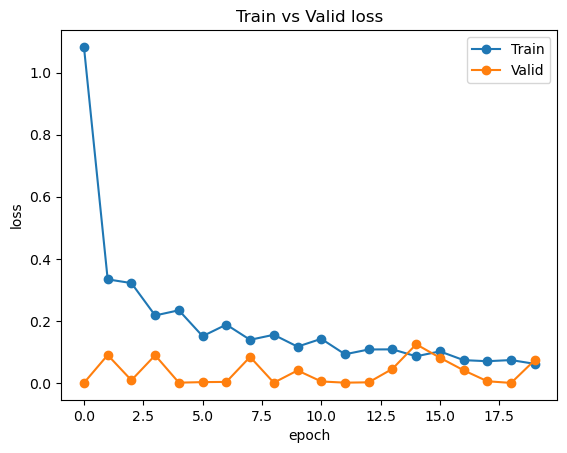

In [10]:
# loading the loss class to validate training and validation loss
x = loss()
x.plot_loss(train_loader, test_loader)

In [13]:
# calculating the accuracy of the CNN on the test dataset
with torch.no_grad():
    correct = 0
    total = 0
    for images, labels in test_loader:
        images = images.to(device)
        labels = labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    print('The calculated Accuracy of the lenet-5 network on the 10000 test images of MINST dataset is : {} %'.format(100 * correct / total))

The calculated Accuracy of the lenet-5 network on the 10000 test images of MINST dataset is : 98.97 %


## References:

https://github.com/lychengrex/LeNet-5-Implementation-Using-Pytorch/blob/master/LeNet-5%20Implementation%20Using%20Pytorch.ipynb
https://github.com/erykml/medium_articles/blob/master/Computer%20Vision/lenet5_pytorch.ipynb
https://blog.paperspace.com/writing-lenet5-from-scratch-in-python/
https://www.pluralsight.com/guides/data-visualization-deep-learning-model-using-matplotlib